In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mat_file = loadmat('./data/nina/DB1/S1_A1_E1.mat')
emg_data = np.array(mat_file['emg'])
print(mat_file.keys())
emg_data.shape

dict_keys(['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])


(101014, 10)

In [5]:
emg_data[0:10,:]

array([[0.0684, 0.0024, 0.0024, 0.0024, 0.0024, 0.0098, 0.0024, 0.0488,
        0.0024, 0.0342],
       [0.0586, 0.0024, 0.0024, 0.0024, 0.0024, 0.0049, 0.0024, 0.0415,
        0.0024, 0.0293],
       [0.0562, 0.0024, 0.0024, 0.0024, 0.0024, 0.0049, 0.0024, 0.0391,
        0.0024, 0.0244],
       [0.0562, 0.0024, 0.0024, 0.0024, 0.0024, 0.0049, 0.0024, 0.0342,
        0.0024, 0.0171],
       [0.0488, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0366,
        0.0024, 0.0146],
       [0.0488, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0366,
        0.0024, 0.0098],
       [0.0439, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0366,
        0.0024, 0.0098],
       [0.0464, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0366,
        0.0024, 0.0049],
       [0.0464, 0.0024, 0.0049, 0.0024, 0.0024, 0.0024, 0.0024, 0.0342,
        0.0024, 0.0024],
       [0.0415, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0342,
        0.0024, 0.0024]])

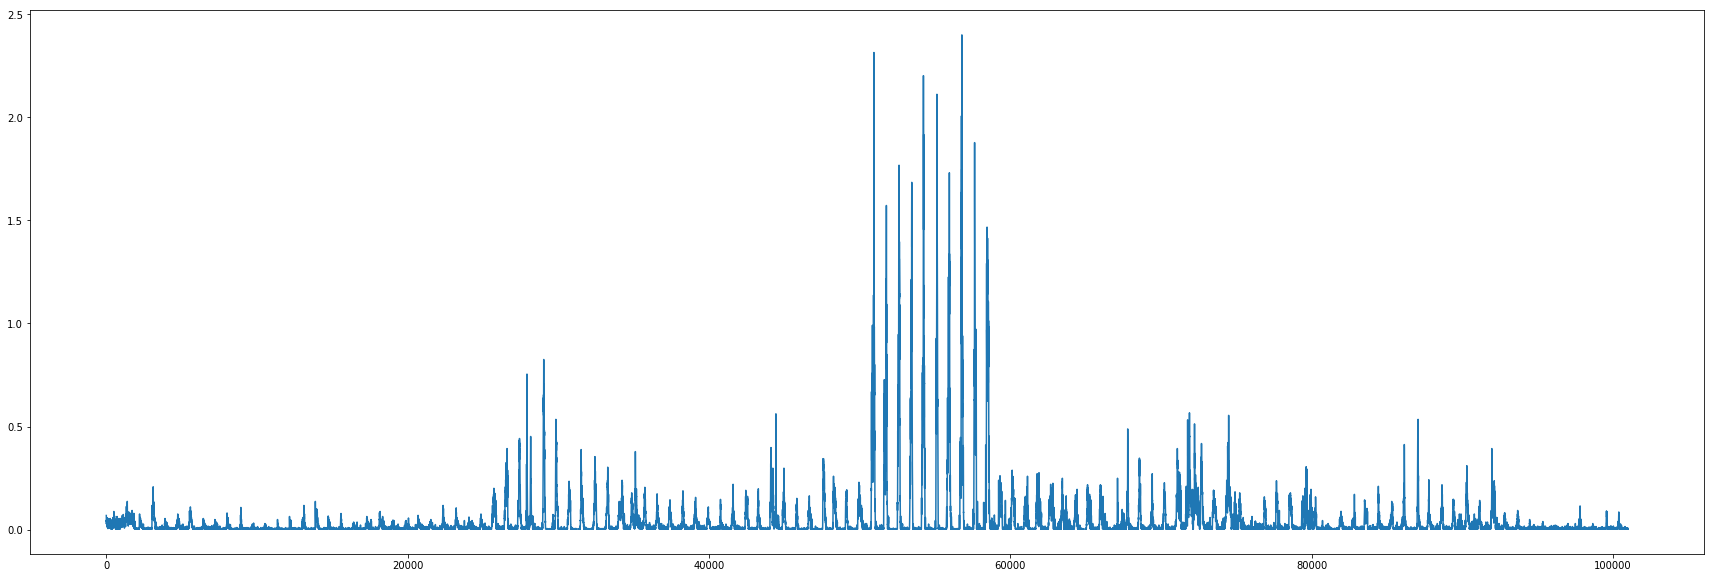

In [6]:
plt.figure(figsize=(30,10))
plt.plot(emg_data[:, 0])

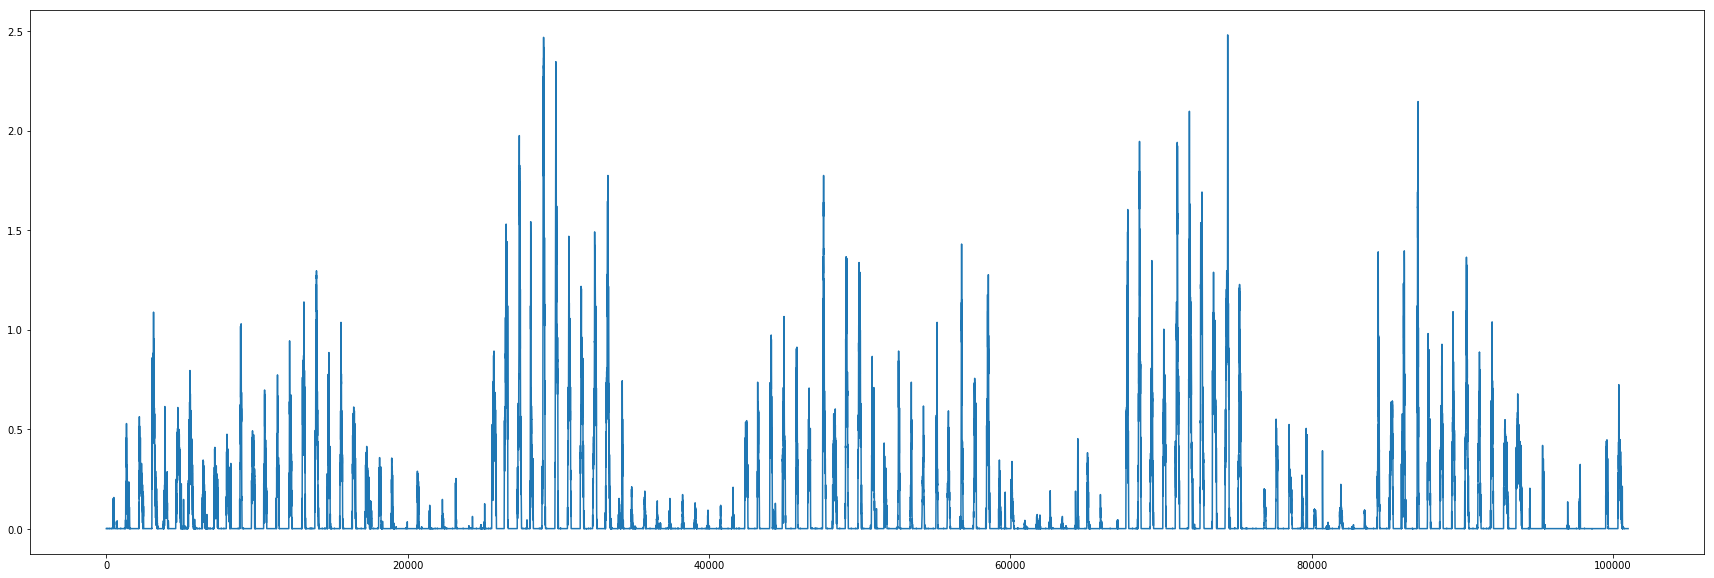

In [7]:
plt.figure(figsize=(30,10))
plt.plot(emg_data[:, 1])

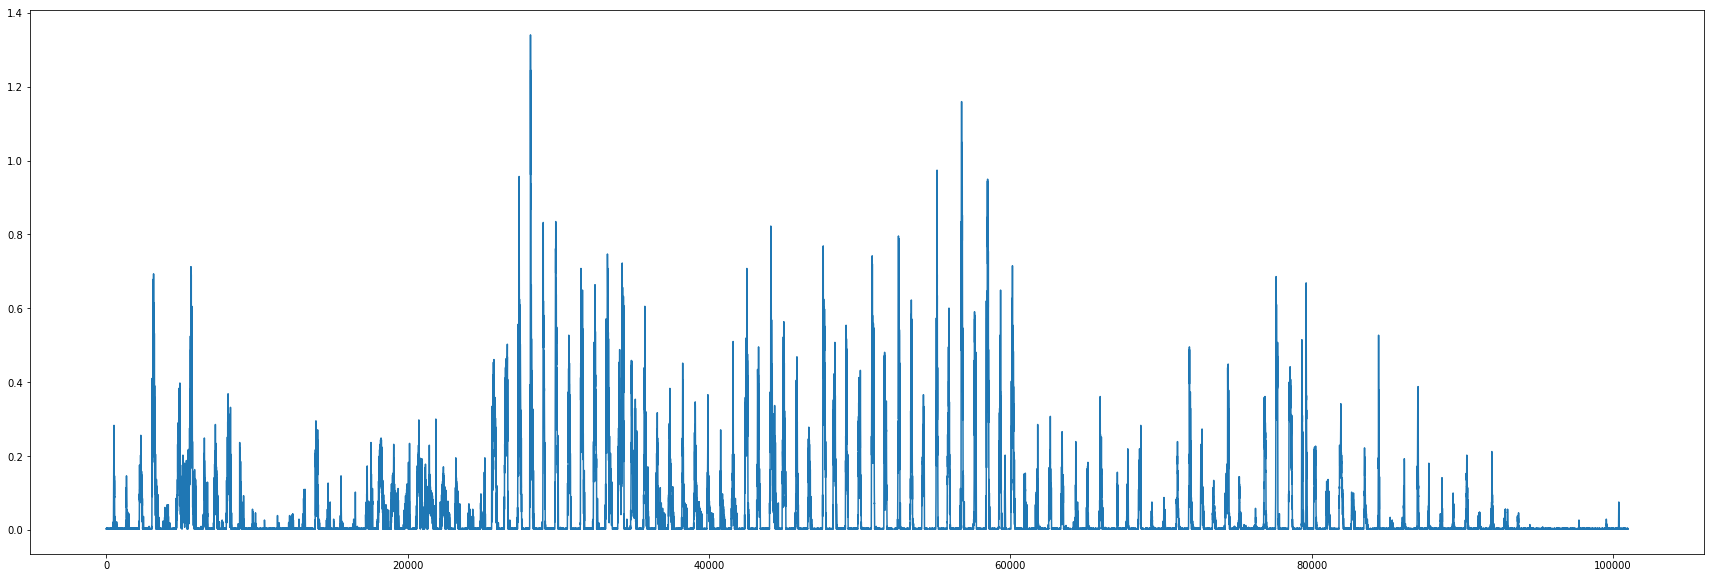

In [8]:
plt.figure(figsize=(30,10))
plt.plot(emg_data[:, 2])

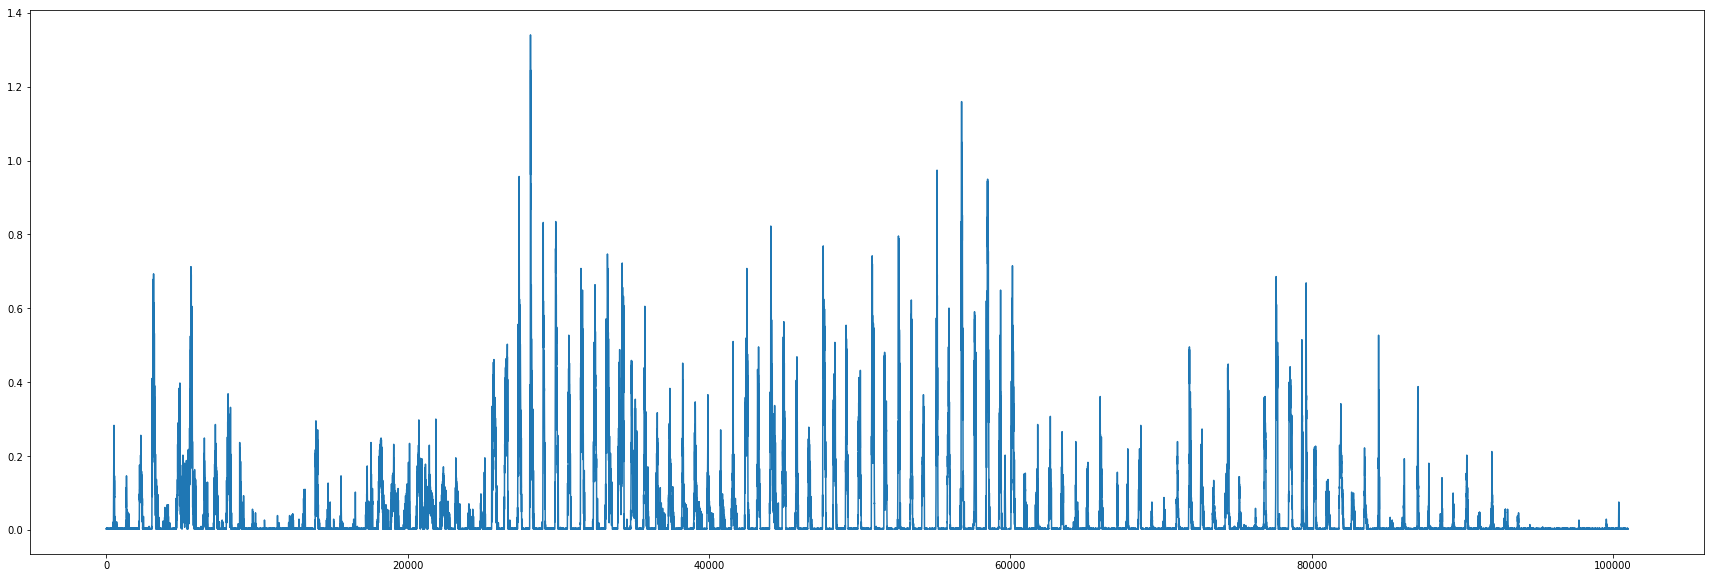

In [9]:
plt.figure(figsize=(30,10))
plt.plot(emg_data[:, 2])

In [11]:
mat_file2 = loadmat('./data/sample/capg-raw-001-001.mat')
emg_data2 = np.array(mat_file2['data'])
print(mat_file2.keys())
emg_data2.shape

dict_keys(['__header__', '__version__', '__globals__', 'data', 'gesture', 'subject'])


(104600, 128)

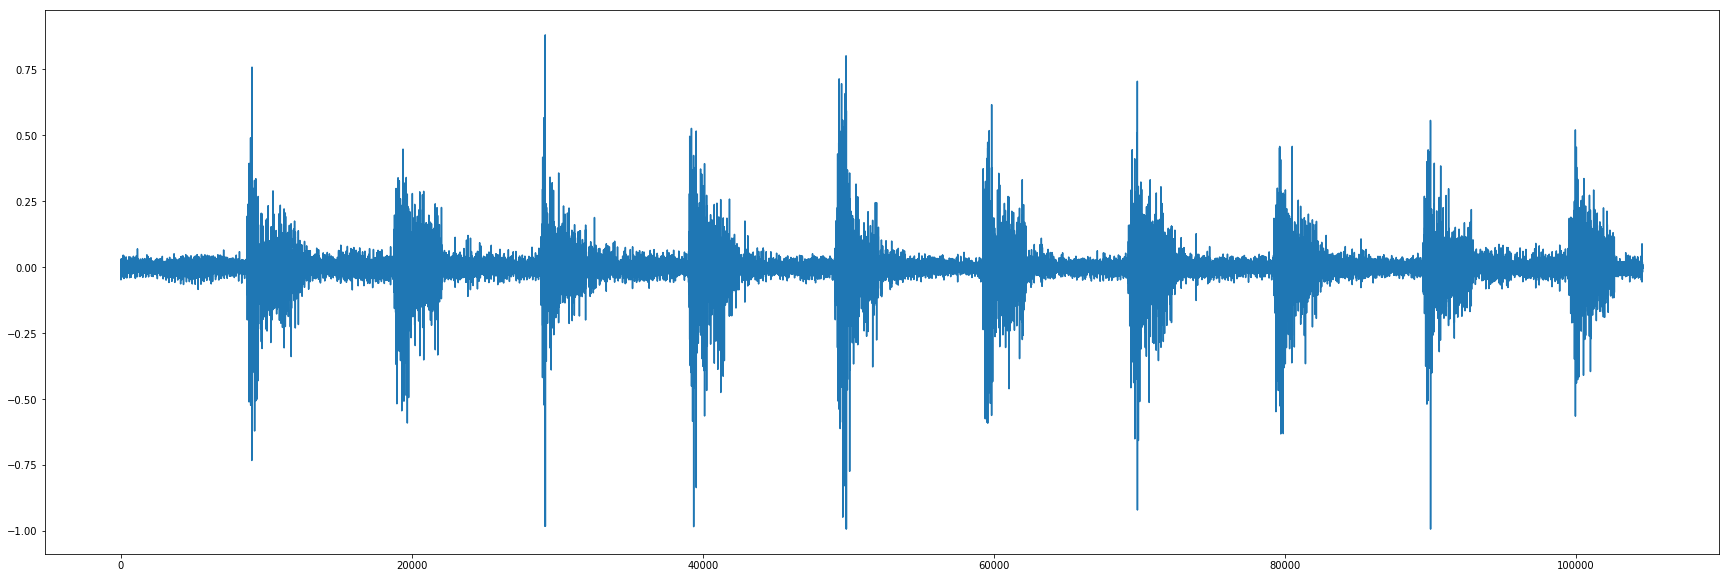

In [12]:
plt.figure(figsize=(30,10))
plt.plot(emg_data2[:, 0])

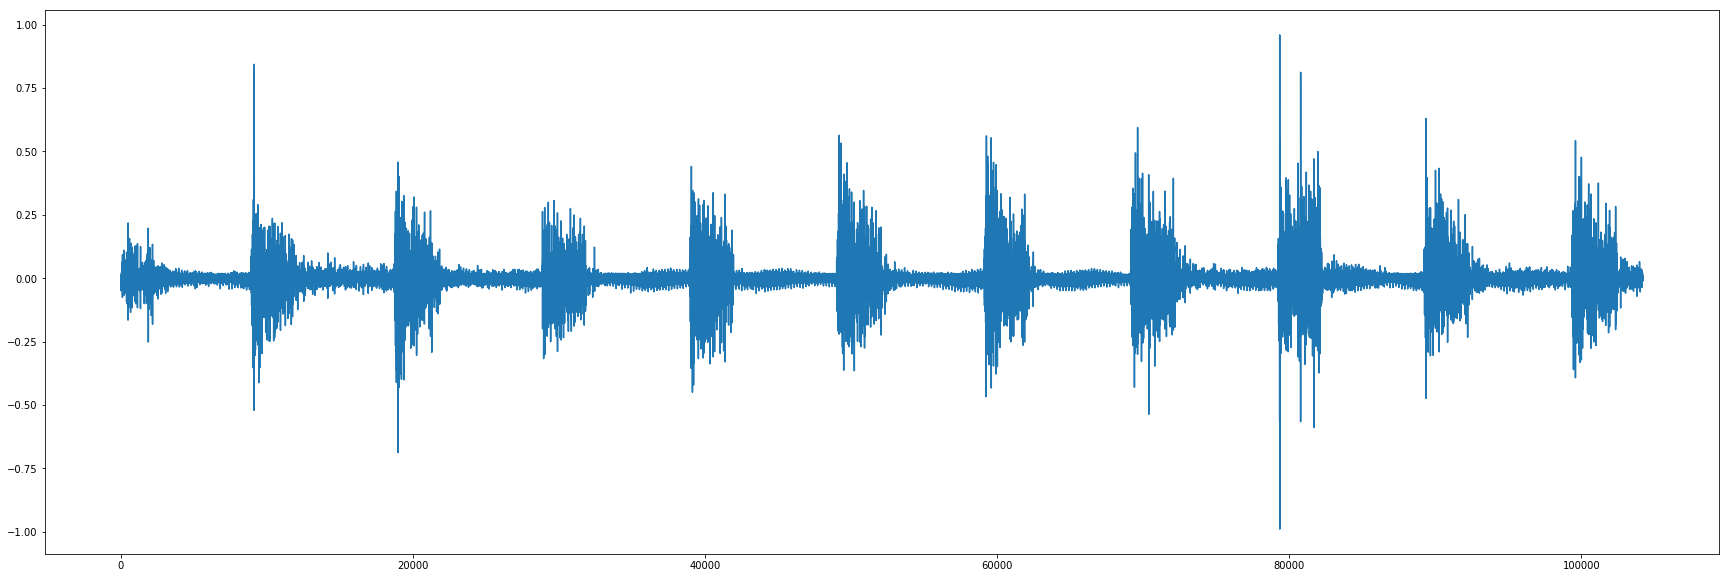

In [15]:
mat_file4 = loadmat('./data/sample/capg-raw-001-002.mat')
emg_data4 = np.array(mat_file4['data'])
plt.figure(figsize=(30,10))
plt.plot(emg_data4[:, 0])

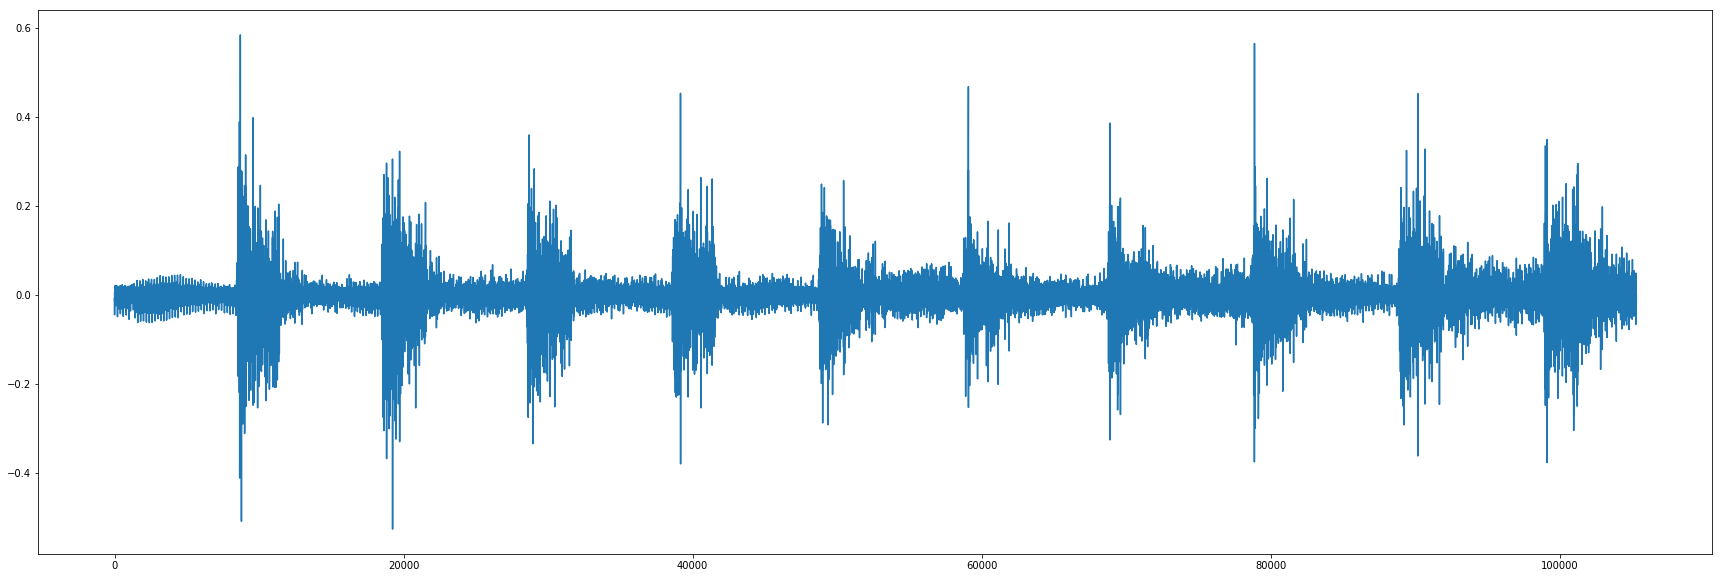

In [16]:
mat_file5 = loadmat('./data/sample/capg-raw-001-003.mat')
emg_data5 = np.array(mat_file5['data'])
plt.figure(figsize=(30,10))
plt.plot(emg_data5[:, 0])

In [18]:
mat_file3 = loadmat('./data/sample/capg-dba-001-001-001.mat')
emg_data3 = np.array(mat_file3['data'])
print(mat_file3.keys())
emg_data3.shape

dict_keys(['__header__', '__version__', '__globals__', 'trial', 'data', 'gesture', 'subject'])


(1000, 128)

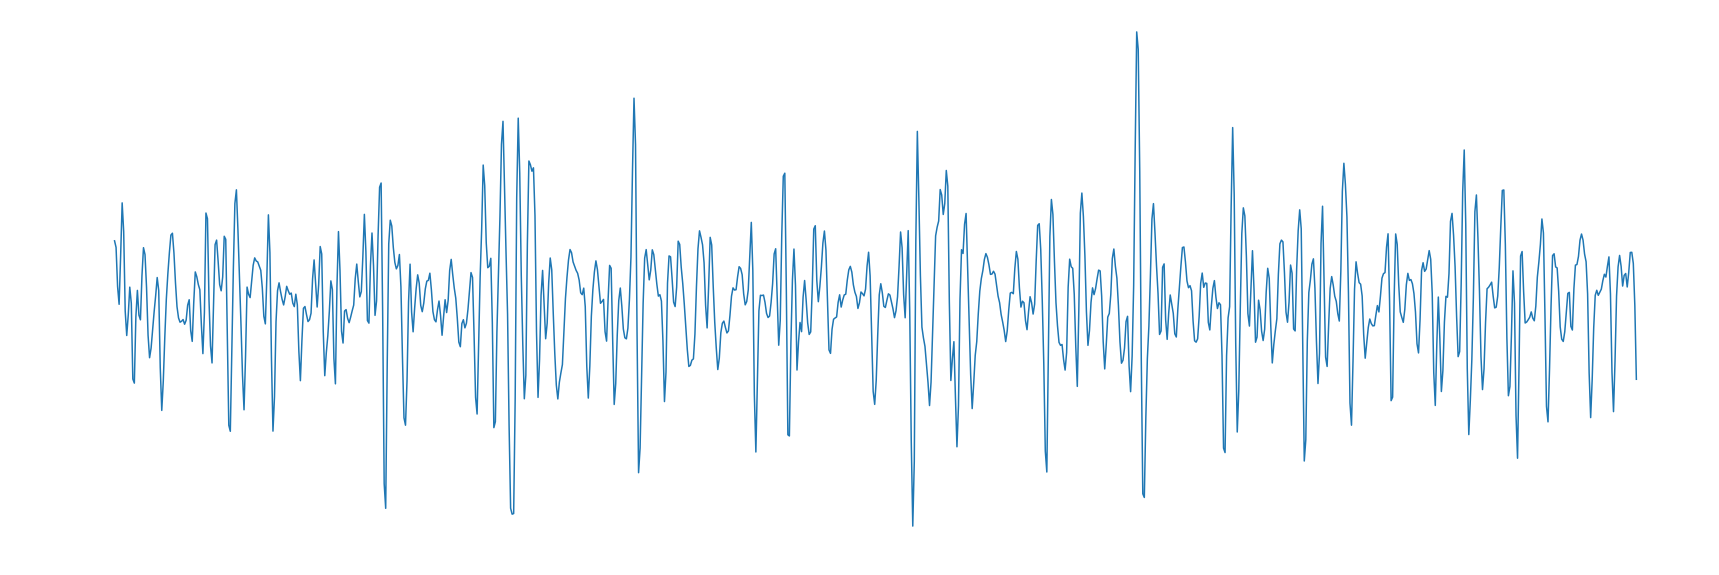

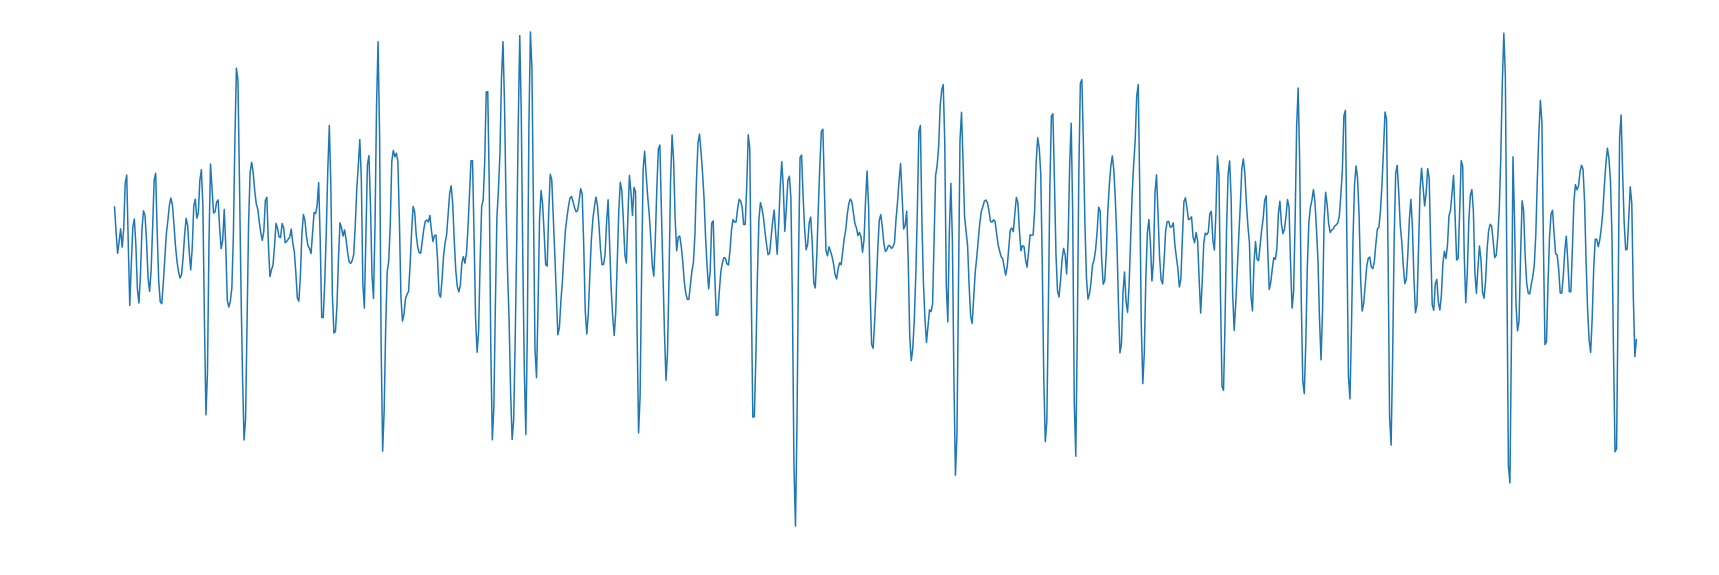

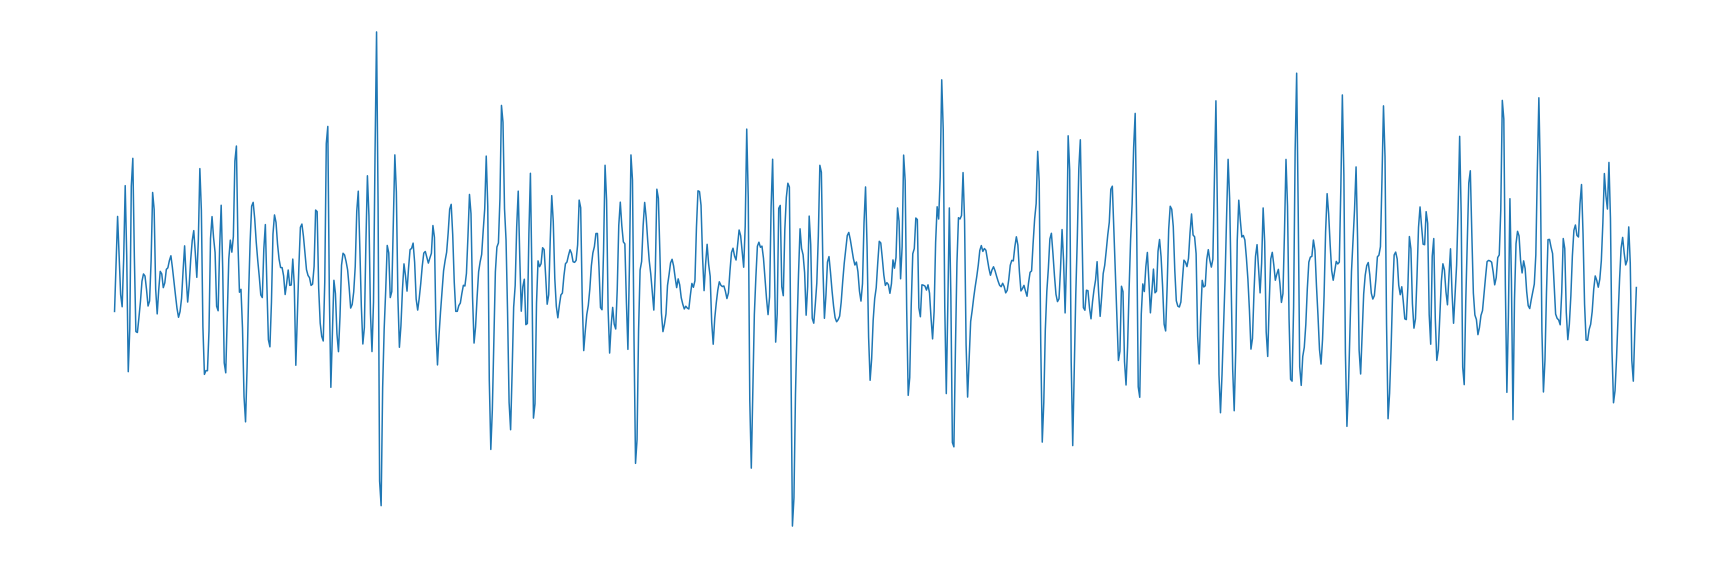

In [31]:

# plt.plot(emg_data3[:, 0])
# plt.savefig('signal.png')

for i in range(emg_data3.shape[1]):
    channel = emg_data3[:, i]
    plt.figure(figsize=(30,10))
    plt.axis('off')
    plt.plot(channel)
    plt.savefig('emg-signal-{}.png'.format(i))
    plt.show()
    if i == 2:
        break

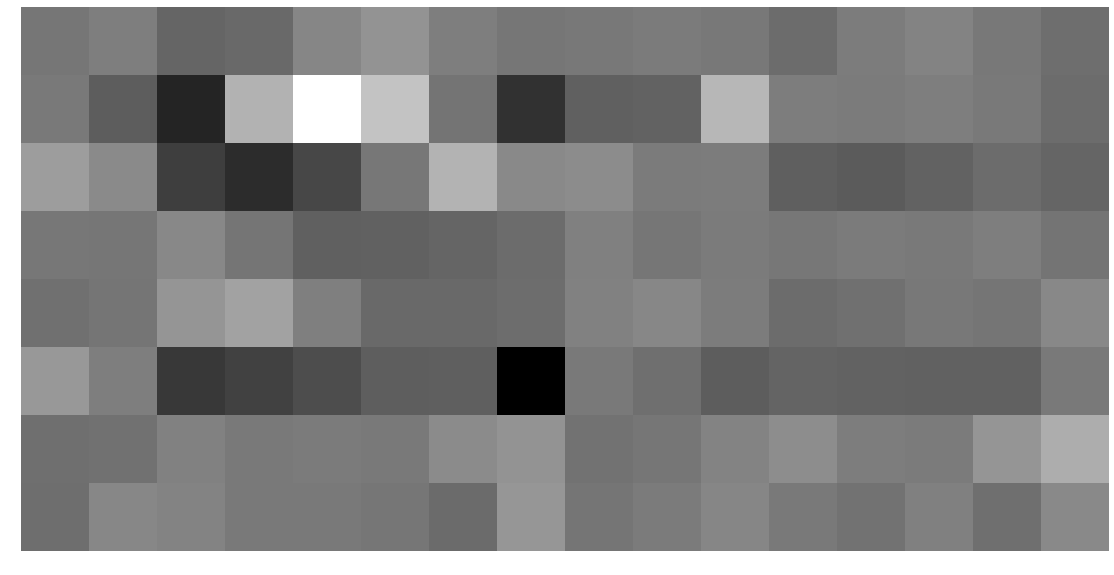

In [28]:
plt.figure(figsize=(30,10))
plt.axis('off')
for i in range(emg_data3.shape[0]):
    frame = np.reshape(emg_data3[i], (8, 16))
    plt.imshow(frame, cmap=plt.cm.gray_r)
    plt.savefig('emg-image-{}.png'.format(i))
    if i == 2:
        break

In [40]:
from math import sqrt

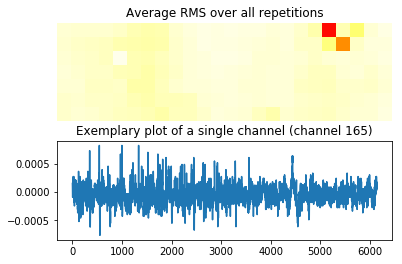

In [41]:
# load the data
mat = loadmat('../data/cslhdemg/subject1/session1/gest0')
gestures = mat['gestures']

#compute RMS
rms = np.zeros(168)
for i in range(0,10):
 trial = gestures[i,0]
 #deleting edge channels
 trial = np.delete(trial,np.s_[7:192:8],0)
 for c in range(0,trial.shape[0]):
     #computing mean rms over all repetitions
     rms[c] += np.linalg.norm(trial[c,:]) / sqrt(len(trial[c,:])) / 10

#reshaping to the correct shape
rms = np.reshape(rms,(24,7))
rms = np.flipud(np.transpose(rms))

#plot data
plt.subplot(211)
plt.imshow(rms, cmap='hot_r', interpolation='nearest', vmin=0, vmax=0.0035)
plt.axis('off')
plt.title('Average RMS over all repetitions')
plt.subplot(212)
plt.plot(gestures[9,0][164,:])
plt.title('Exemplary plot of a single channel (channel 165)')
plt.show()
